<a href="https://colab.research.google.com/github/YilBC/TalentoYB/blob/main/Lab%202.%20Natural_Lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install googletrans==4.0.0-rc1
!pip install googletrans-temp

In [2]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [3]:
df = pd.read_csv('/content/Comentarios.csv')
df.head()

,Comentario
0,La comida fue excelente y el servicio fue exce...
1,El ambiente era agradable y la comida estaba d...
2,"La comida estaba bien, pero el servicio fue le..."
3,"No me gustó la comida, estaba fría y el sabor ..."
4,El peor restaurante en el que he estado. No lo...


In [4]:
import pandas as pd
from textblob import TextBlob

# Asegúrate de que la función getPolarity esté correctamente definida
def getPolarity(text):
    try:
        # Calcular la polaridad utilizando TextBlob (puede ser diferente si usas googletrans)
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        print(f"Error al procesar el comentario: {text}, Error: {e}")
        return None  # Devuelve None o algún valor por defecto

# Cargar el dataset
df = pd.read_csv('/content/Comentarios.csv')

# Aplicar la función para calcular la polaridad
df['polaridad'] = df['Comentario'].apply(getPolarity)

# Guardar los resultados
df.to_csv('resultados.csv', index=False)


In [7]:
positivos = df[df['polaridad'] > 0].shape[0]
negativos = df[df['polaridad'] < 0].shape[0]
neutros = df[df['polaridad'] == 0].shape[0]

print(f"Comentarios positivos: {positivos}")
print(f"Comentarios negativos: {negativos}")
print(f"Comentarios neutros: {neutros}")
#Este es para saber la cantidad de comentarios positivos y negativos

Comentarios positivos: 3
Comentarios negativos: 9
Comentarios neutros: 59


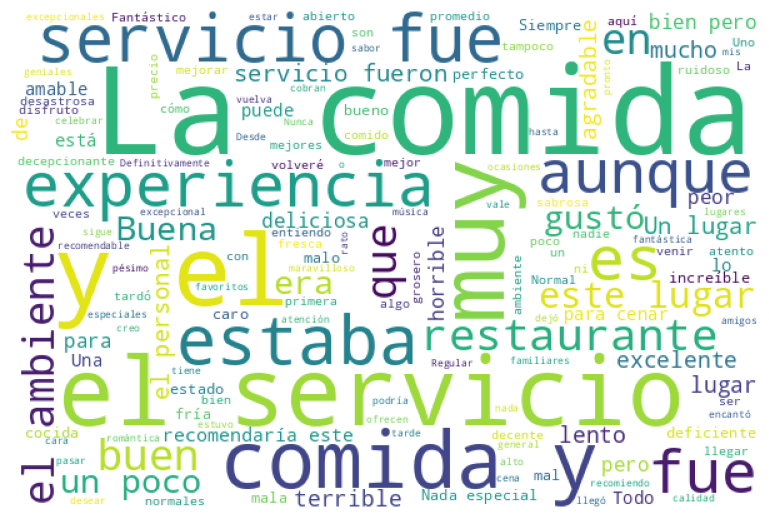

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()